## Module 7 - Network Practice

In this notebook, we will see how to create network and tree visualizations using `igraph` and `networkD3`. 


You may have to **rerun** cells to get the network output for networkD3 examples. 


Here are some references for the libraries we will use:

- [igraph manual pages](http://igraph.org/r/doc/)

- [igraph reference](https://cran.r-project.org/web/packages/igraph/igraph.pdf)

- [networkD3 reference](https://cran.r-project.org/web/packages/networkD3/networkD3.pdf)

- [network data sources](http://www-personal.umich.edu/~mejn/netdata/)


## `igraph` Library


There are several different ways of defining graphs. Let's start with a simple network. Here, we will create the network **from scratch by giving the list of edges**. 


Edges are represented by vertex pairs. Two vertices (nodes) are connected by an edge (link) in the following example:


Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



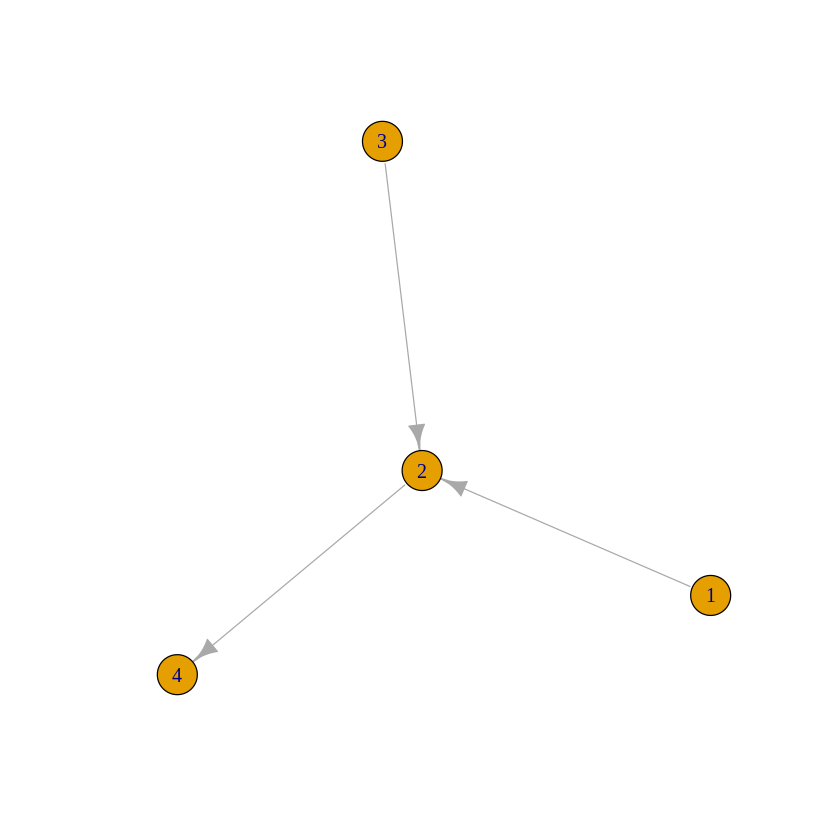

In [1]:
library(igraph)

# we can create a graph by giving a list of edges that are represented as vertex pairs. 
edges <- c(1,2, 3,2, 2,4)

# now CONVERT it to a directed graph
g<-graph(edges, n=max(edges), directed=TRUE)

# there are 3 pairs, so there will be three edges 
plot(g)

Note that `g` is a graph, not a data frame. 

In [2]:
g

IGRAPH 4708d3b D--- 4 3 -- 
+ edges from 4708d3b:
[1] 1->2 3->2 2->4

We can find out some properties and compute some basic **statistics** about a graph like in the following examples: 

In [3]:
# vertex count
vcount(g)

[1] 4

In [4]:
# edge count
ecount(g)

[1] 3

In [5]:
# neighbors of the first vertex 
neighbors(g, V(g)[1], mode = 1)

+ 1/4 vertex, from 4708d3b:
[1] 2

In [6]:
# statistics about neighbors
incident(g,V(g)[2], mode=c("all", "out", "in", "total"))

+ 3/3 edges from 4708d3b:
[1] 2->4 1->2 3->2

In [7]:
# are these vertices connected ? 
are.connected(g, V(g)[1], V(g)[3])

[1] FALSE

In [8]:
# get a list of graph edges 
get.edgelist(g)

1,2
3,2
2,4


In [9]:
# List of vertices 
V(g)

+ 4/4 vertices, from 4708d3b:
[1] 1 2 3 4

### YOUR TURN: 

**Create the first graph** from the lab notebook with five edges using the `igraph` functions. 

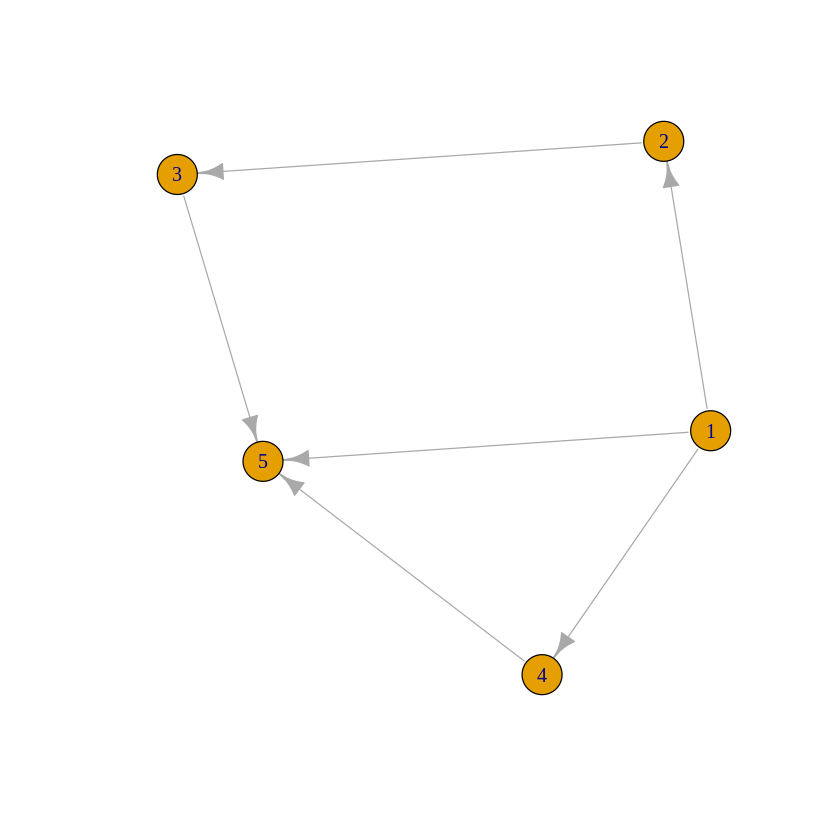

In [10]:
edges <- c(1,2, 1,5, 1,4, 2,3, 3,5, 4,5)

g<-graph(edges, n=max(edges), directed=TRUE)

plot(g)

**Can you also create the second graph with the directed edges?** 

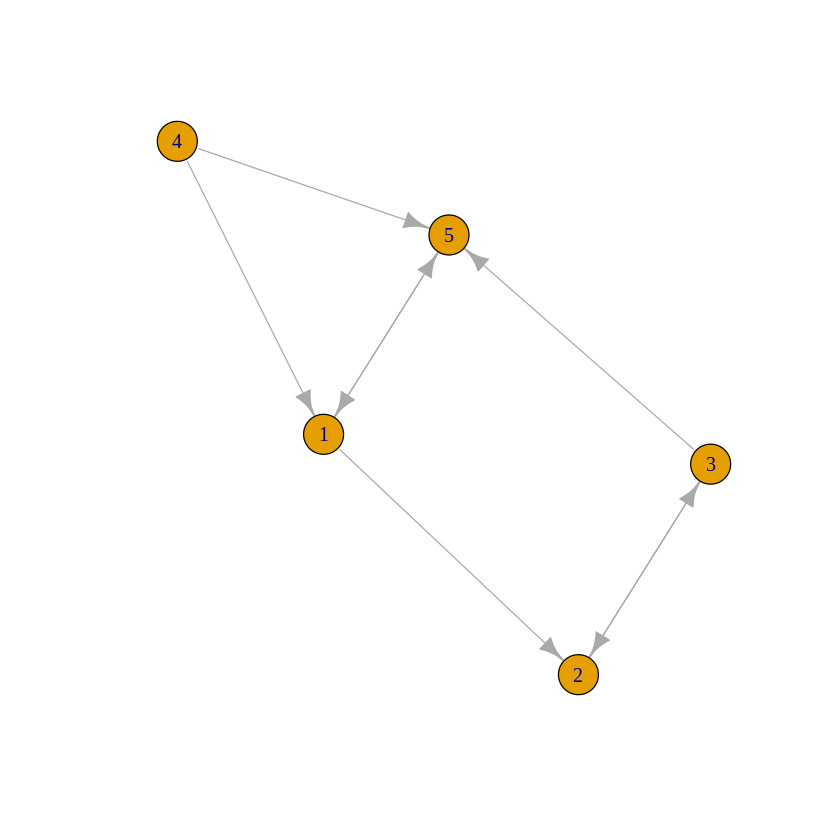

In [11]:
edges <- c(1,2, 1,5, 2,3, 3,2, 3,5, 4,1, 4,5, 5,1)

g<-graph(edges, n=max(edges), directed=TRUE)

plot(g)


--- 

## Reading Graphs from File

We can also read an **edge list from a plain text file** and convert it to a graph. 

In this example, the vertices (nodes) are labeled by letters, and each row represents an edge between two vertices. 

In [12]:
# This is the file content:
# A,B
# A,G
# A,Y
# G,Y

t <-read.csv("/dsa/data/all_datasets/networks/graph1.txt", header=FALSE)

# t is a data frame
head(t)

V1,V2
<fct>,<fct>
A,B
A,G
A,Y
G,Y


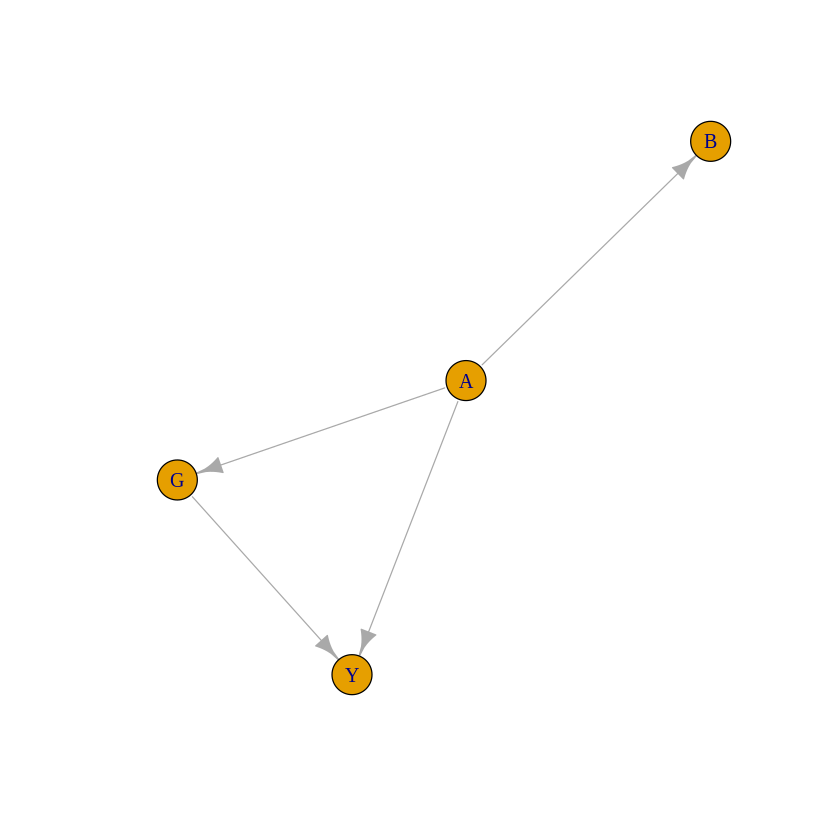

In [13]:
# g2 is a graph
g2 <- graph.data.frame(t)
plot(g2)

### YOUR TURN: 

**Compute the same statistics** for `g2` as before done for `g`. 

In [17]:
# vertex count
vcount(g2)

# edge count
ecount(g2)

# statistics about neighbors
incident(g2,V(g2)[2], mode=c("all", "out", "in", "total"))

# get a list of graph edges 
get.edgelist(g2)

[1] 4

[1] 4

+ 2/4 edges from 73eb3c3 (vertex names):
[1] G->Y A->G

A,B
A,G
A,Y
G,Y



---


We can also read an **adjacency matrix** from a text file as opposed to a list of vertex pairs. 


Remember what an adjacency matrix is from the lab material. This is a sample row from the file showing the **connectivity of the first vertex** to the other vertices:

```
 0 1 1 1 0 0 0 0 1 0 0 1 0
```

In [18]:
adj_matrix <- as.matrix(read.table("/dsa/data/all_datasets/networks/SAcountries.txt",header=FALSE, sep=" "))
adj_matrix

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13
0,1,1,1,0,0,0,0,1,0,0,1,0
1,0,1,1,0,0,0,0,1,1,0,0,0
1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,0,0,0,0,0,0,0,1,0,0,0
0,0,1,0,0,1,0,0,0,1,0,0,1
0,0,0,0,1,0,0,0,0,1,0,0,0
0,0,1,0,0,0,0,0,0,0,1,0,0
0,0,1,0,0,0,0,0,0,0,1,0,1
1,1,1,0,0,0,0,0,0,0,0,0,0
0,1,1,1,1,1,0,0,0,0,0,0,0


We also need **names/labels for vertices (nodes). The above matrix data actually represents **neighborhood relationships between the countries in South America**. 

Let's read the country names from a different file:

In [19]:
SAnames <- read.csv("/dsa/data/all_datasets/networks/SAcountrylist.txt", header=FALSE)
head(SAnames)

V1
<fct>
Argentina
Bolivia
Brazil
Chile
Colombia
Ecuador


Let's build an **undirected** simple (nonweighted) graph from the above matrix. **Study the following code:**

In [20]:
gSA <-  graph_from_adjacency_matrix(adj_matrix, weighted = NULL,  mode = "undirected")

# remove loops
gSA <- simplify(gSA)
# set labels and degrees of vertices
gSA <- set_vertex_attr(gSA, "label", value= as.vector(SAnames$V1))

gSA

IGRAPH 0e0332d UN-- 13 25 -- 
+ attr: name (v/c), label (v/c)
+ edges from 0e0332d (vertex names):
 [1] V1--V2  V1--V3  V1--V4  V1--V9  V1--V12 V2--V3  V2--V4  V2--V9  V2--V10
[10] V3--V5  V3--V7  V3--V8  V3--V9  V3--V10 V3--V11 V3--V12 V3--V13 V4--V10
[19] V5--V6  V5--V10 V5--V13 V6--V10 V7--V11 V8--V11 V8--V13

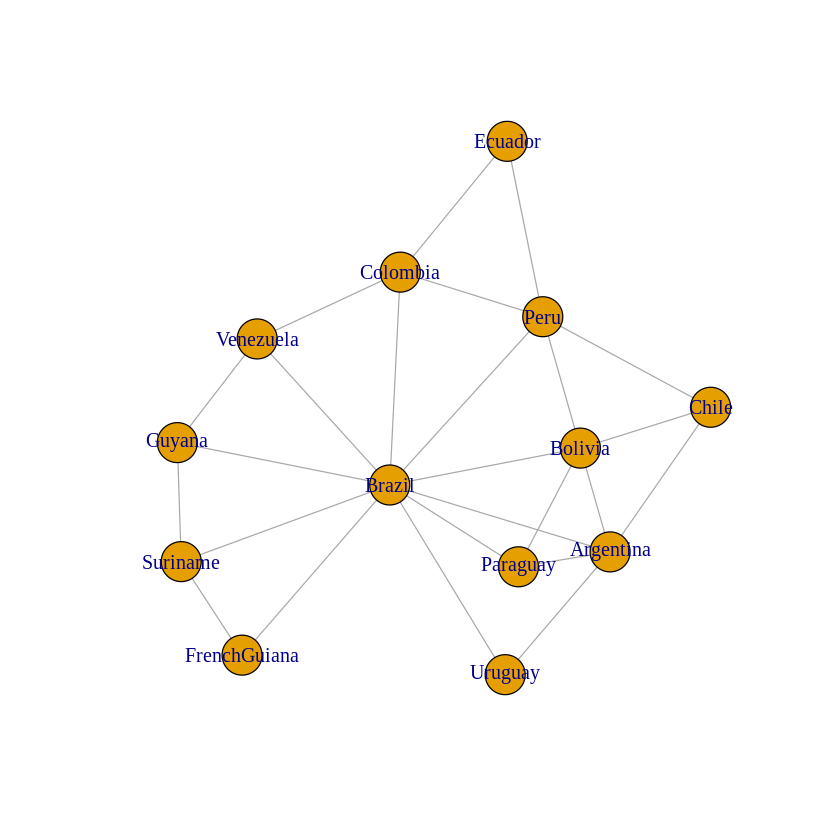

In [23]:
plot(gSA)

**You can create new attributes for each vertex in the graph like this:** 

In [21]:
# create an attribute to hold degree for each vertex
V(gSA)$degree <- degree(gSA)

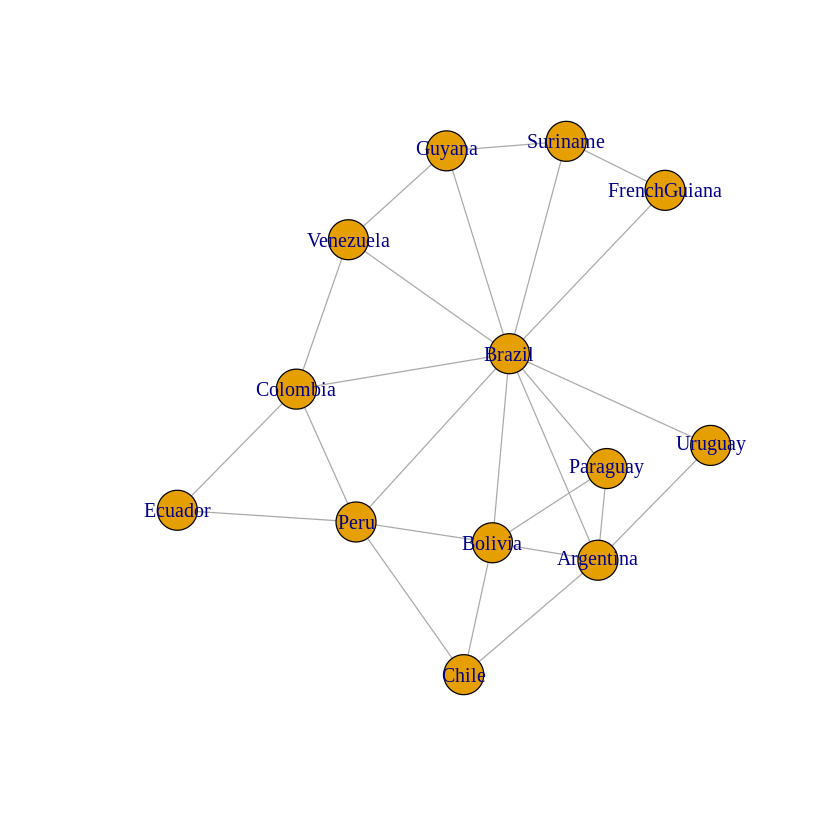

In [22]:
# do a force-directed layout 
layout1 <- layout.fruchterman.reingold(gSA)

# draw the newtwork 
plot(gSA, layout=layout1)

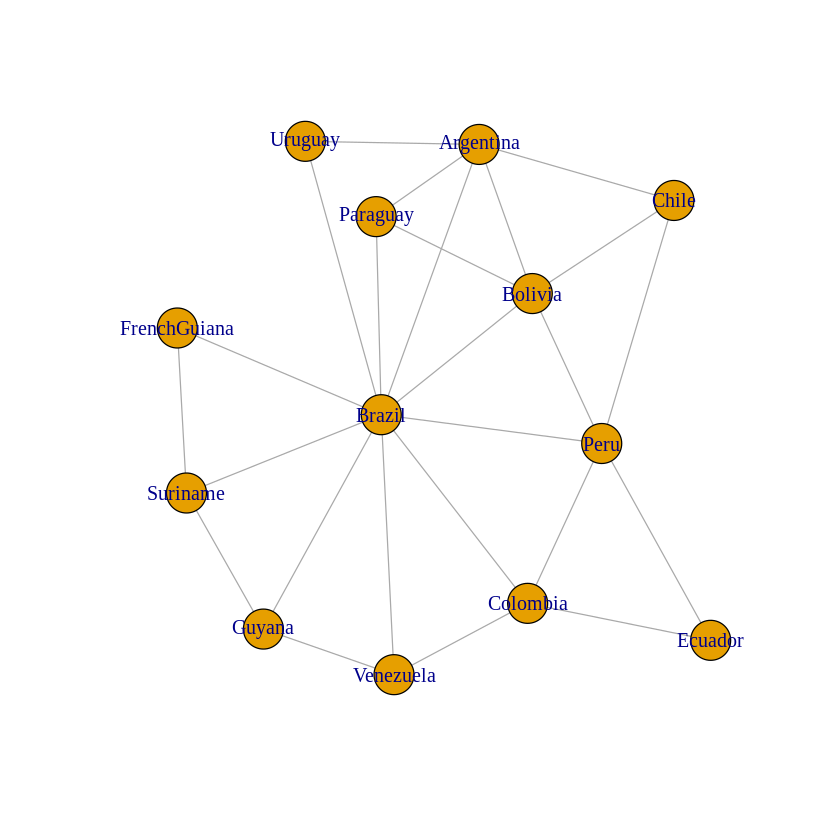

In [24]:
# another layout 
plot(gSA, layout=layout.kamada.kawai)


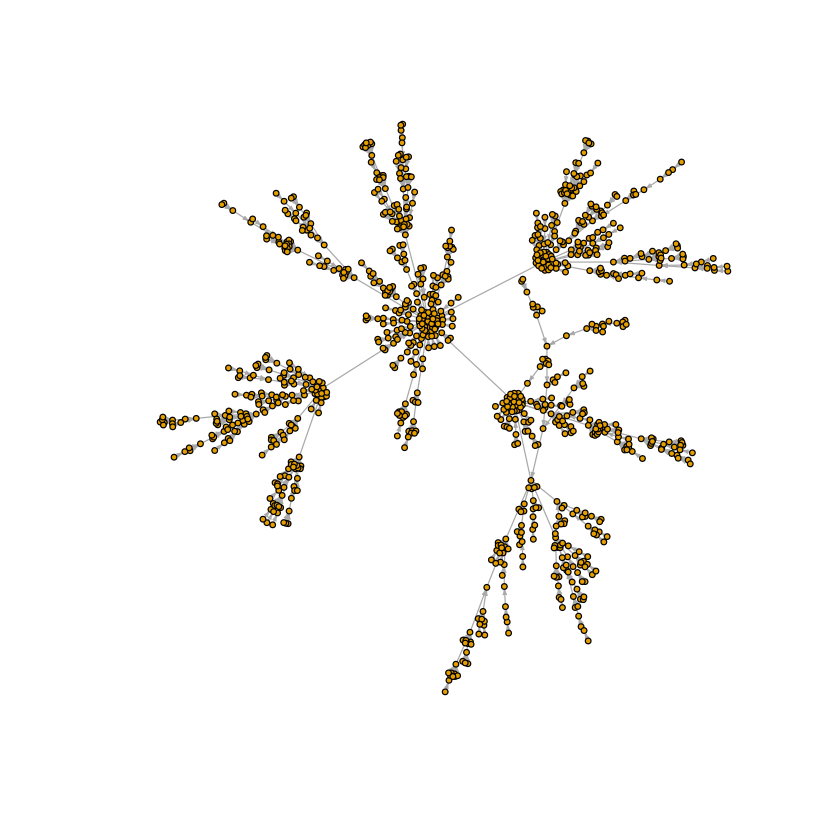

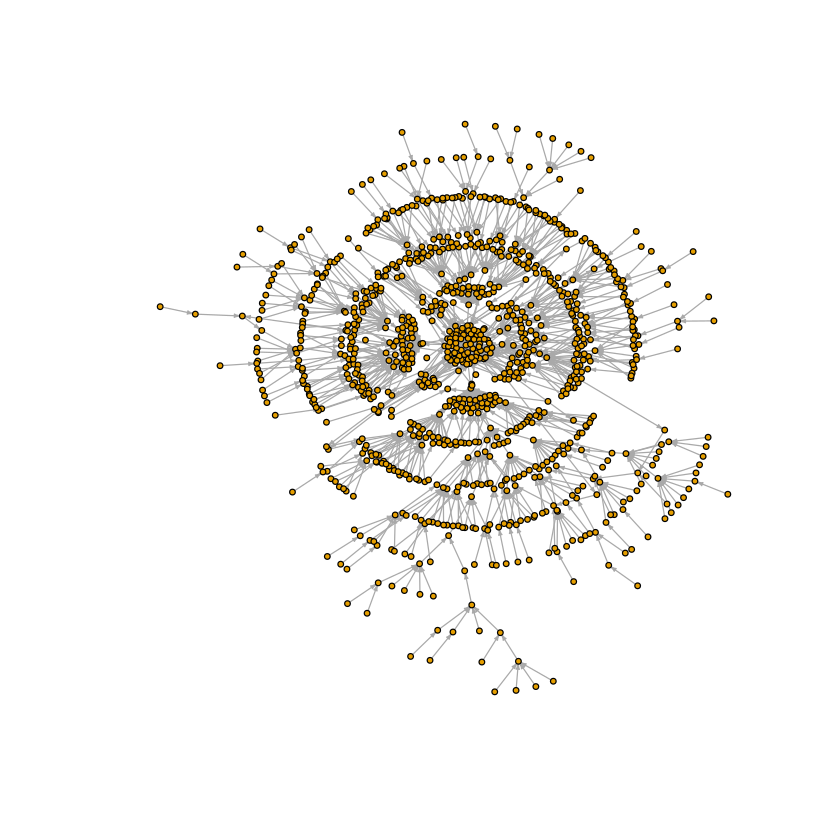

In [25]:
# this is an example of a more complicated graph, it'll take a while to draw:
gb <- barabasi.game(1000, power=1)
l1 <- layout.fruchterman.reingold(gb)
l2 <- layout.kamada.kawai
plot(gb, layout=l1, vertex.size=2, vertex.label=NA, edge.arrow.size=.2)
plot(gb, layout=l2, vertex.size=2, vertex.label=NA, edge.arrow.size=.2)

## networkD3 Library 

`networkD3` library is an R interface to the **D3 Javascript library**. 


Let's do similar layouts in networkD3. **This library produces interactive graphs, you can click on a node and drag it, for example.** 

It requires two sets of vertices as input to create a graph from them: source vertices, and target vertices. 

In [26]:
library(networkD3)

# Create edge data
src <- c("A", "A", "A", "A",
        "B", "B", "C", "C", "D")

target <- c("B", "C", "D", "J",
            "E", "F", "G", "H", "I")

networkData <- data.frame(src, target)

# Plot - may need to run twice 
simpleNetwork(networkData, height=300)

HTML widgets cannot be represented in plain text (need html)

**We can also convert the `igraph` graphs to `D3` graphs.**


In [32]:
gSA_d3 <- igraph_to_networkD3(gSA)

# Create force directed network plot - you can zoom into this graph with mouse 
forceNetwork(Links = gSA_d3$links, Nodes = gSA_d3$nodes, Source = 'source', Target = 'target', 
             NodeID = 'name', Group = 'name', height=500, zoom=TRUE, fontSize=20)

HTML widgets cannot be represented in plain text (need html)

### IS THIS GRAPH PLANAR ? MOVE THE VERTICES WITH MOUSE TO GET RID OF ALL EDGE CROSSINGS IF YOU CAN.


---




Let's look at a more complex data set. This dataset contains the **co-occurance network of characters in Victor Hugo's novel *Les Misérables*.** 


**A vertex represents a character**, and an **edge between two vertices shows that these two characters appeared in the same chapter** of the the book. The **weight** of each edge indicates how often such a co-appearance occured.

In [28]:
# This is the Les Miserables data set that comes with the library 
data(MisLinks)
data(MisNodes)

Edges (links) have **weights** that are represented by the `value` column in the data frame as below: 

In [29]:
head(MisLinks) # EDGE DATA - has weights 

source,target,value
<int>,<int>,<int>
1,0,1
2,0,8
3,0,10
3,2,6
4,0,1
5,0,1


Vertices (nodes) have two attributes: `group` and `size`. 

In [30]:
head(MisNodes) # VERTEX DATA - has size and grouping 

name,group,size
<fct>,<int>,<int>
Myriel,1,15
Napoleon,1,20
Mlle.Baptistine,1,23
Mme.Magloire,1,30
CountessdeLo,1,11
Geborand,1,9


**Can you identify how many different visual channels represent attributes about the data set below?** 

In [31]:
# Plot - Move mouse over VERTICES to see character names 

forceNetwork(Links = MisLinks, Nodes = MisNodes,
            Source = "source", Target = "target",
            Value = "value", NodeID = "name",
            Group = "group", opacity = 0.8, height=600, zoom=TRUE, fontSize=30)

HTML widgets cannot be represented in plain text (need html)

**Look at [here](https://www.rdocumentation.org/packages/networkD3/versions/0.4/topics/forceNetwork) for all the options you can use with `forceNetwork()` function.**

### Here are some links that show alternative visualizations for the same data set: 
 - https://bost.ocks.org/mike/miserables/
 - https://studentwork.prattsi.org/infovis/labs/character-networks-visualization-for-les-miserables/
 - https://studentwork.prattsi.org/infovis/visualization/les-miserables-character-network-visualization/

### YOUR TURN: 

**Create an interactive network** for the South America data from above. You'll need to create two data frames similar to the `Mis` example. 

In [ ]:
< YOUR CODE HERE >

Now, **find neighbors of Bolivia** using the `neighbors()` function. For that, you'll need an `igraph` graph. 

In [ ]:
< YOUR CODE HERE >


---


**We can also read graphs in GML format.** 

This example contains an undirected social network of frequent associations between 62 dolphins in a community living off Doubtful Sound, New Zealand, as compiled by Lusseau et al. (2003). 

In [ ]:
gml_data <- read.graph("/dsa/data/all_datasets/networks/dolphins.gml", format=c("gml"))
head(gml_data)

In [ ]:
gml_data <- simplify(gml_data)

dol <- igraph_to_networkD3(gml_data)

forceNetwork(Links = dol$links, Nodes = dol$nodes, NodeID = "name", Group = "name", height=600, zoom=TRUE)

**With this data set, we can experiment with community detection functions of `igraph` by clustering vertices like this:** 

In [ ]:
cfg <- cluster_fast_greedy(as.undirected(gml_data))
plot(cfg, gml_data)

In [ ]:
ceb <- cluster_edge_betweenness(gml_data)
plot(ceb, gml_data)

In [ ]:
clp <- cluster_label_prop(gml_data)
plot(clp, gml_data)

### Radial Networks

We can also read network data in JSON format like in the example below: 

In [ ]:
# example of a radial network given in Javascript's JSON format.
library(jsonlite)
URL <- "https://raw.githubusercontent.com/christophergandrud/networkD3/master/JSONdata/flare.json"

## Convert the data to list format
Flare <- fromJSON(URL, simplifyDataFrame = FALSE)

In [ ]:
# JSON format
Flare

In [ ]:
# Use subset of data for a more readable diagram
Flare$children = Flare$children[1:3]

radialNetwork(List = Flare, fontSize = 20, opacity = 1, height=600)

We can **visualize clusters** with a radial network like this: 

In [ ]:
hc <- hclust(dist(USArrests), "ave")
radialNetwork(as.radialNetwork(hc))